## Correlation coefficients 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy.ma as ma

We will be looking at isotopic composition (delta 18O) values of precipitation. Let's start with stations around North Atlantic. Dansgaard (1964) originally chose those locations to interpret Greenland ice core data.

In [3]:
filename='/Users/jungeunl/Cycad/class/data/dansgaard.dat' #using Python on my laptop
#filename='dansgaard.dat'

# Read a file and choose DATE as an index
df = pd.read_csv(filename,delim_whitespace=True)
print(df)

     Lat    Lon  do18  Temp
0   13.0  -59.0  -2.5  25.4
1  -40.3   -9.9  -3.3  12.0
2  -46.9  -37.7  -4.6   8.8
3   62.0   -6.8  -6.1   6.1
4   64.1  -21.8  -7.2   5.5
5   78.1   13.6 -10.4  -2.7
6   52.7   -8.9  -5.3  11.3
7   51.5    0.0  -6.2  11.4
8   53.3   -6.2  -6.2   9.7
9   60.2    5.2  -7.5   6.5
10  55.0    8.7  -6.7   9.6
11  55.7   12.6  -7.5   9.4
12  59.8   23.2  -9.4   5.4
13  59.3   17.4  -9.7   5.1
14  61.2  -48.5 -11.0   0.2
15  66.9  -53.7 -15.5  -4.8
16  65.4  -37.2 -15.9  -5.5
17  70.3  -22.0 -17.7  -9.2
18  61.8  -21.4  -7.2   5.5
19  49.0  -54.6  -8.2   5.4
20  61.8  -49.6 -14.5  -2.8
21  72.5  -56.2 -16.8  -8.4
22  81.7  -17.8 -20.4 -14.3
23  82.5  -38.3 -24.5 -16.0
24  63.4  -44.6 -16.7  -3.7
25  71.3  -37.9 -28.6 -19.2
26  65.2  -43.8 -21.1  -9.1
27  66.4  -46.2 -21.1  -9.1
28  70.3  -45.6 -27.3 -16.7
29  71.1  -37.3 -28.6 -19.2
30  75.8  -43.8 -19.6 -17.3
31  77.2  -61.1 -22.0 -13.6
32 -66.0   76.1 -15.3 -10.0
33 -78.0 -165.0 -16.7 -17.7
34 -78.4  -86.5 -27.

Make a plot.

Text(0, 0.5, 'd18O (permil)')

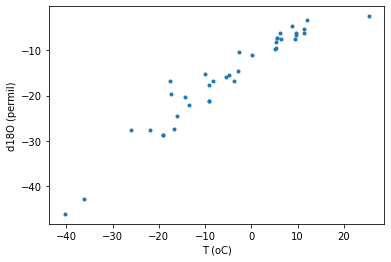

In [4]:
plt.plot(df.Temp,df.do18,'.')
plt.xlabel('T (oC)')
plt.ylabel('d18O (permil)')

Simple way to calculate correlation coefficients.

In [5]:
df.corr(method='pearson')

,Lat,Lon,do18,Temp
Lat,1.000000,0.182735,0.338050,0.368756
Lon,0.182735,1.000000,0.217031,0.282253
do18,0.338050,0.217031,1.000000,0.959442
Temp,0.368756,0.282253,0.959442,1.000000


Now let's calculate the correlation coefficient and r-value between d18O and Temp. scipy.stats.pearsonr returns the correlation coefficient and r-value.

In [6]:
r,p=stats.pearsonr(df.Temp,df.do18)
print(r,p)

0.9594417190462717 2.195771887551005e-21


scipy.stats.linregress calculates a linear least-squares regression for two sets of measurements. Print out the slope and y-intercept for the linear regression.

In [7]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df.Temp,df.do18)
print(slope, intercept)

0.6967162391940933 -12.507703941220582


Make a plot with a linear fit.

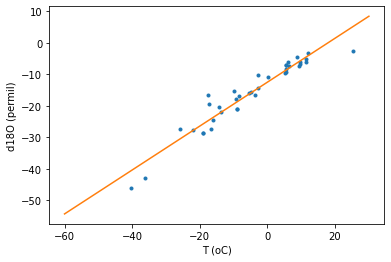

In [8]:
plt.plot(df.Temp,df.do18,'.')
plt.xlabel('T (oC)')
plt.ylabel('d18O (permil)')
xx=np.arange(-60,31)
yy=xx*slope+intercept
plt.plot(xx,yy)

Exclude the value with T > 15oC

In [10]:
# Mask out where T greater than 15oC
temp_new=ma.masked_outside(df.Temp,-60.,15.)
# define mask
mask_temp=ma.getmask(temp_new)
# Mask out where T greater than 15oC
d18o_new=ma.masked_array(df.do18,mask=mask_temp)

#Accessing only the valid entries

#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope2, intercept2, r_value, p_value, std_err = stats.linregress(temp_new[~mask_temp],d18o_new[~mask_temp])

print(slope2, intercept2)

0.7327467912852892 -12.093450817500504


Exclude the values with T > 15oC and make the same plot as above.

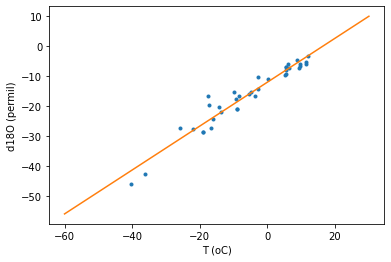

In [12]:
plt.plot(temp_new,d18o_new,'.')
plt.xlabel('T (oC)')
plt.ylabel('d18O (permil)')
xx=np.arange(-60,31)
yy=xx*slope+intercept
plt.plot(xx,yy)

### Exercise
Now let's use all precipitation isotope data. 
Read gnip_annual.txt using pandas.

Make a scatter plot between d18O and Temp.

Now let's calculate the correlation coefficient and r-value between d18O and Temp.

Print out the slope and y-intercept for the linear regression.

Make a scatter plot between d18O and Temp. Then add a linear regression fit.

Exclude the values with T > 15oC.

Make a scatter plot and linear regression fit, excluding the values with T>15oC.